# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


from sklearn.preprocessing import LabelEncoder

# Reading Data and Basic Analysis

In [2]:
df = pd.read_csv("mcdonalds.csv")

# View the dataset
print(df.head())

# Summary of the data
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

df

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   y

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:

label_encoder = LabelEncoder()
binary_columns = ['yummy','convenient','spicy','fattening',	'greasy','fast','cheap','tasty','expensive','healthy','disgusting','Gender']

for i in binary_columns:
    df[i] = label_encoder.fit_transform(df[i])


print(df)

      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           1      0          1       0     1      1      0   
1         1           1      0          1       1     1      1      1   
2         0           1      1          1       1     1      0      1   
3         1           1      0          1       1     1      1      1   
4         0           1      0          1       1     1      1      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           1      0          1       1     0      0      0   
1449      1           1      0          1       0     0      1      1   
1450      1           1      0          1       0     1      0      1   
1451      1           1      0          0       0     1      1      1   
1452      0           1      0          1       1     0      0      0   

      expensive  healthy  disgusting          Like  Age      VisitFrequency  \
0             1        0           0        

In [4]:
df[['Like']]

,Like
0,-3
1,+2
2,+1
3,+4
4,+2
...,...
1448,I hate it!-5
1449,+2
1450,+3
1451,+4


In [5]:
def extract_numeric(value):
    try:
        return int(value.strip("+").split()[-1])
    except ValueError:
        return None  # Handle cases where conversion fails

# Apply the function to the 'Like' column
df['Like_numeric'] = df['Like'].apply(extract_numeric)


df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like_numeric
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,0,-3.0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,0,2.0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,0,1.0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,0,4.0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,1,NaN
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,0,2.0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,0,3.0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,1,4.0


In [6]:
df['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [7]:
df = pd.get_dummies(df, columns=['VisitFrequency'], dtype = int)
df['Like_numeric'] = df['Like_numeric'].fillna(df['Like_numeric'].mean())
df = df.drop("Like" , axis = 1)
df


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender,Like_numeric,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0,1,0,1,0,1,1,0,1,0,0,61,0,-3.000000,1,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,51,0,2.000000,1,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,62,0,1.000000,1,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,69,0,4.000000,0,0,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,49,1,2.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,47,1,1.013817,0,0,0,0,0,1
1449,1,1,0,1,0,0,1,1,0,1,0,36,0,2.000000,0,0,0,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0,52,0,3.000000,0,0,0,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,41,1,4.000000,1,0,0,0,0,0


In [8]:
df.isna().sum()

yummy                                   0
convenient                              0
spicy                                   0
fattening                               0
greasy                                  0
fast                                    0
cheap                                   0
tasty                                   0
expensive                               0
healthy                                 0
disgusting                              0
Age                                     0
Gender                                  0
Like_numeric                            0
VisitFrequency_Every three months       0
VisitFrequency_More than once a week    0
VisitFrequency_Never                    0
VisitFrequency_Once a month             0
VisitFrequency_Once a week              0
VisitFrequency_Once a year              0
dtype: int64

In [9]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,Gender,Like_numeric,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0,1,0,1,0,1,1,0,1,0,0,61,0,-3.000000,1,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,51,0,2.000000,1,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,62,0,1.000000,1,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,1,69,0,4.000000,0,0,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,0,49,1,2.000000,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,47,1,1.013817,0,0,0,0,0,1
1449,1,1,0,1,0,0,1,1,0,1,0,36,0,2.000000,0,0,0,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0,52,0,3.000000,0,0,0,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0,41,1,4.000000,1,0,0,0,0,0


# Data Visualization (Distribution of Variables)

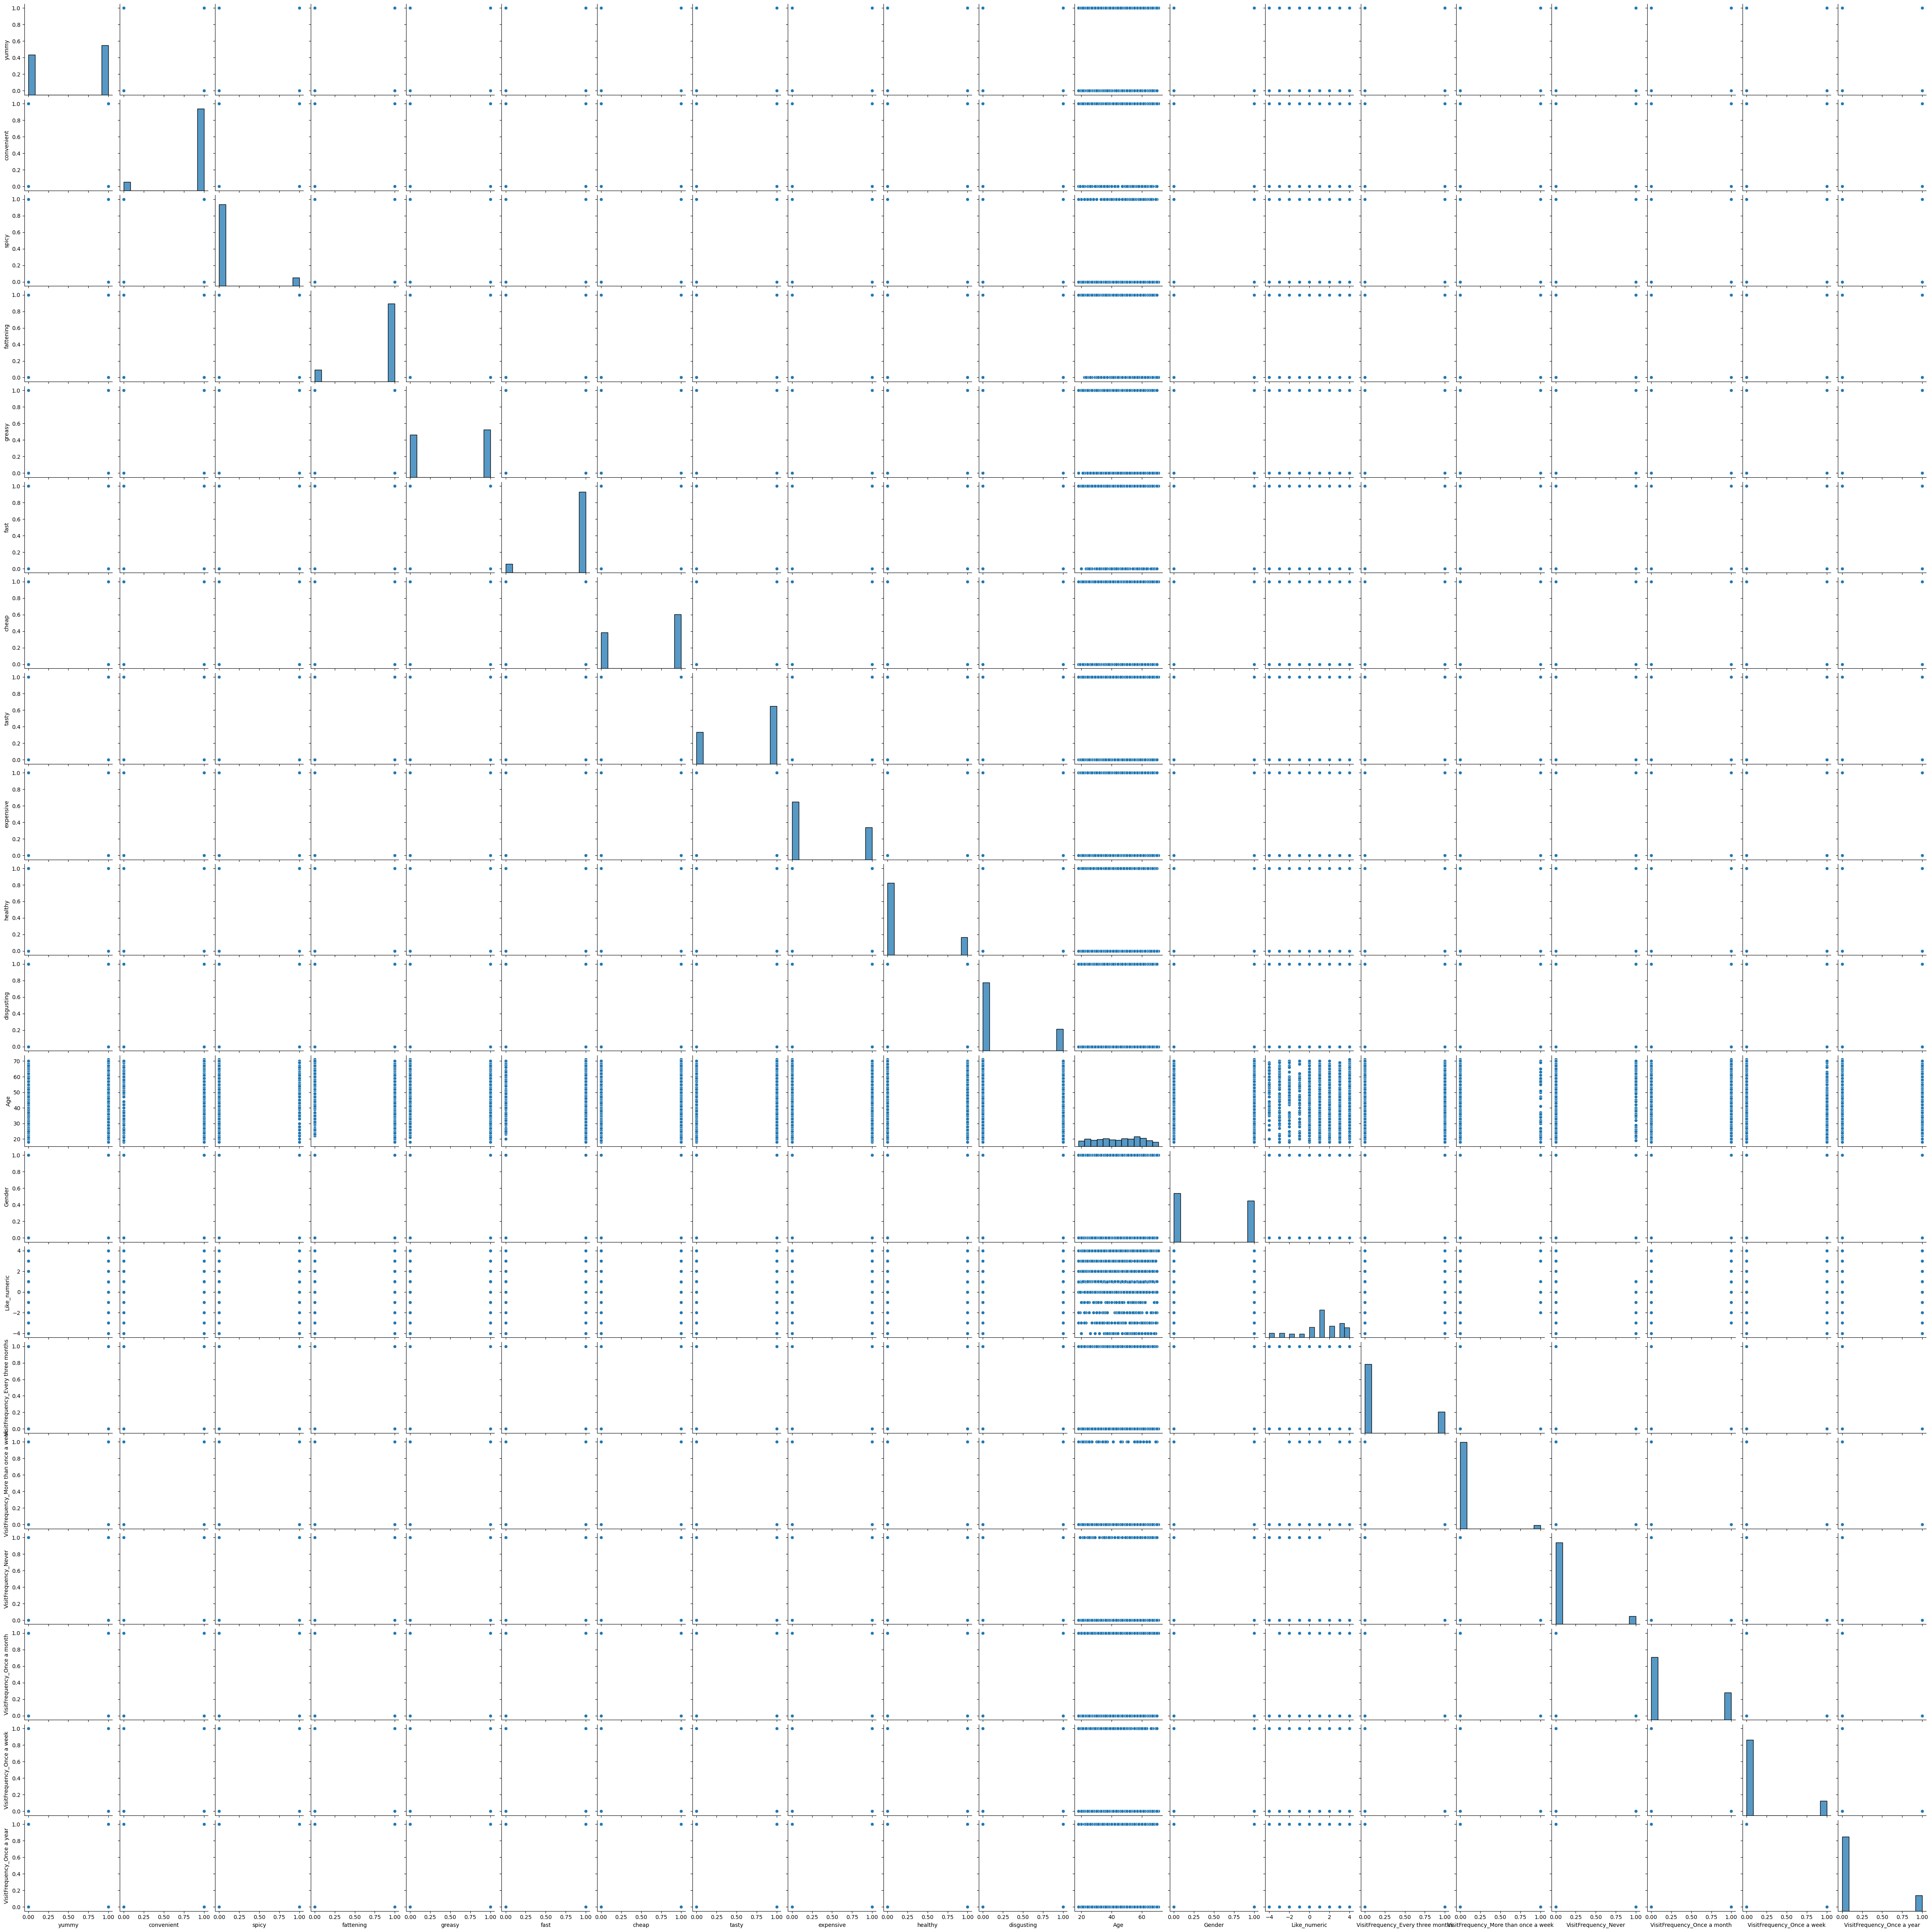

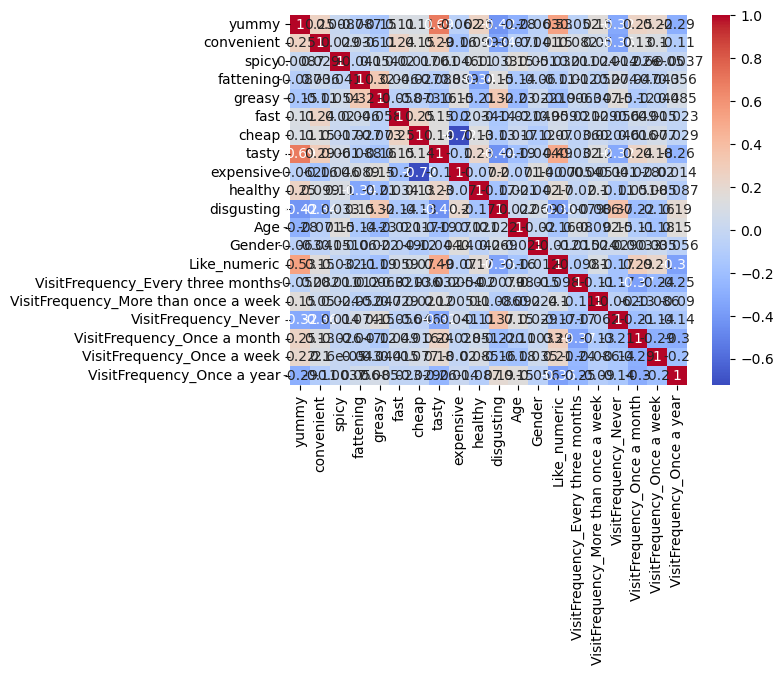

In [10]:
# Pairplot for visualizing relationships
sns.pairplot(df)
plt.show()

# Heatmap for correlations
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# Standardizing Data

In [11]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert to DataFrame for better readability
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)


# PCA (Principal Component Analysis)

Explained Variance Ratio: [1.83940122e-01 9.50432958e-02 7.99462117e-02 6.94237346e-02
 6.67078966e-02 6.19962590e-02 5.60930600e-02 5.30313965e-02
 4.91960414e-02 4.57701260e-02 4.15054734e-02 3.57877818e-02
 3.12573724e-02 2.79634313e-02 2.65020049e-02 2.53172179e-02
 2.29685750e-02 1.49442819e-02 1.26057180e-02 5.65985013e-33]


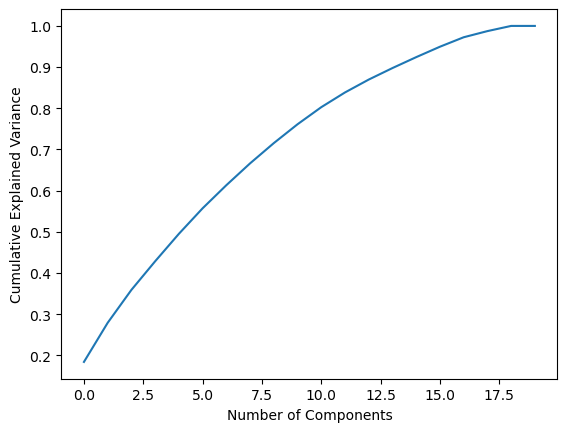

In [12]:
# PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


# Hierarchical Clustering

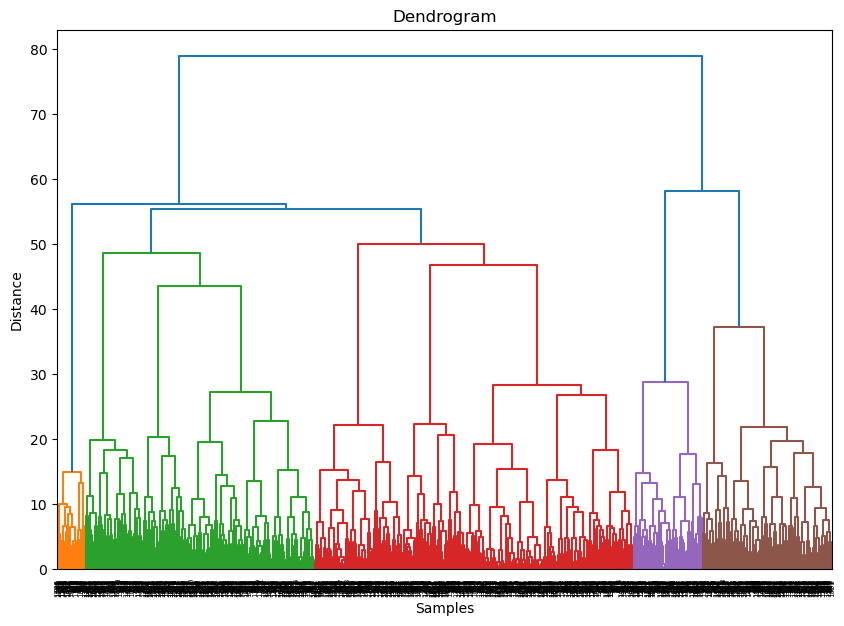

In [13]:
# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Assign cluster labels
clusters_hierarchical = fcluster(linkage_matrix, t=5, criterion='maxclust')
df['Cluster_Hierarchical'] = clusters_hierarchical


# Model training

In [14]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original dataset
df['Cluster_KMeans'] = kmeans.labels_

# Cluster centroids
print("Centroids:", kmeans.cluster_centers_)


Centroids: [[-1.03454815e+00 -1.73983760e+00  1.63463305e-02  1.65962441e-01
   4.77732128e-01 -5.05706356e-01 -2.96255251e-01 -1.06018203e+00
   3.47763945e-01 -3.47693795e-01  1.28107281e+00  3.82188223e-01
   1.45283221e-01 -5.87644092e-01 -3.87373983e-01 -1.67578858e-01
   2.14644447e+00 -5.98478657e-01 -3.94726137e-01  3.77451133e-03]
 [ 7.23195839e-01  2.41837224e-01  9.66756566e-03 -1.40372920e-01
  -2.17700204e-01  1.14373535e-01  1.25090448e-01  6.58001200e-01
  -1.14809996e-01  2.48013068e-01 -4.36786613e-01 -2.42884557e-01
  -6.76298665e-02  5.72156117e-01 -9.44580953e-02  1.43326932e-01
  -3.06157582e-01  3.29962177e-01  2.42235330e-01 -3.69919434e-01]
 [-8.58444950e-01  2.66255893e-01 -2.34543147e-02  1.80456758e-01
   1.92395847e-01  3.48665713e-05 -1.01916403e-01 -7.33860434e-01
   6.34283836e-02 -2.97211730e-01  2.57969731e-01  2.74518790e-01
   6.10102658e-02 -7.70792690e-01  3.19535874e-01 -1.84999039e-01
  -3.14789270e-01 -3.41470297e-01 -2.68402383e-01  6.47666132e-

# Cluster Visualization

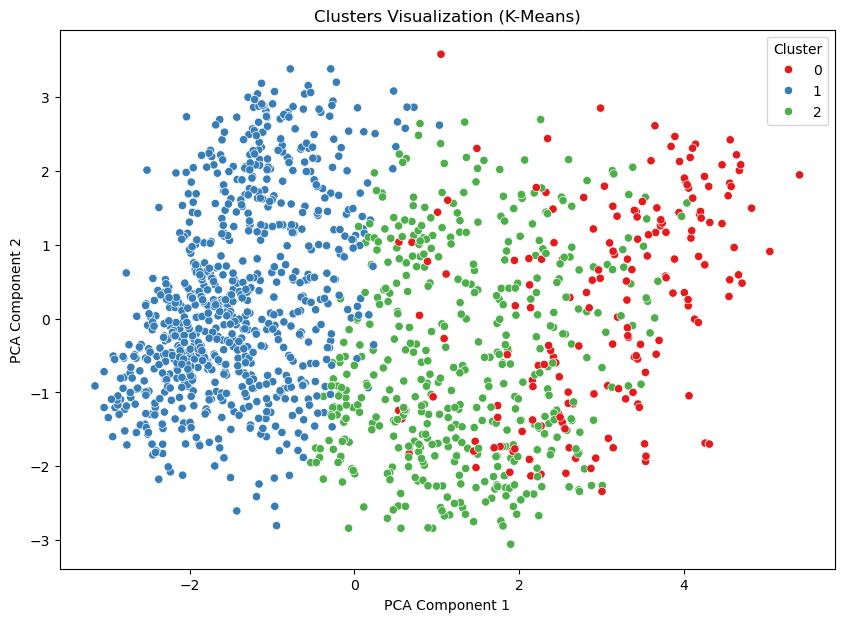

In [15]:
# Visualize the clusters for the first two PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster_KMeans'], palette='Set1')
plt.title('Clusters Visualization (K-Means)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


# Saving Results

In [16]:
# Save the dataset with cluster labels
df.to_csv('clustered_data.csv', index=False)
